In [97]:
import numpy as np
import matplotlib.pyplot as plt

from stacked_mnist import StackedMNISTData, DataMode
from models.auto_encoder import AutoEncoder
from models.mnist_classifier import MNISTClassifier

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

from scipy.stats import skewnorm

from utils import *

In [98]:
model = AutoEncoder(in_channels=1)
model.load_state_dict(torch.load('trained_models/auto_encoder.pt'))

<All keys matched successfully>

(512, 1, 1)


(array([128., 108.,  92.,  68.,  50.,  30.,  20.,  10.,   4.,   2.]),
 array([0.        , 0.28977188, 0.57954376, 0.86931564, 1.15908751,
        1.44885939, 1.73863127, 2.02840315, 2.31817503, 2.60794691,
        2.89771878]),
 <a list of 10 Patch objects>)

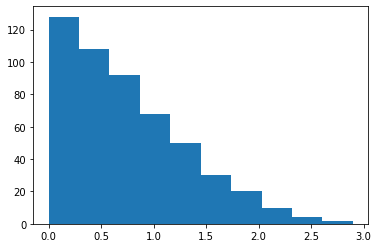

In [99]:
skew = True

if not skew: 
    z = np.random.uniform(0, 1, size=(512, 1, 1))
else:
    z = np.maximum(skewnorm.rvs(a=5, size=(512, 1, 1)), 0)
    
print(z.shape)
plt.hist(z.flatten())

In [100]:
z = torch.from_numpy(z.astype(np.float32))

model.eval()
with torch.no_grad():
    generated_image = model.decoder(z)

In [101]:
generated_image.shape

torch.Size([1, 28, 28])

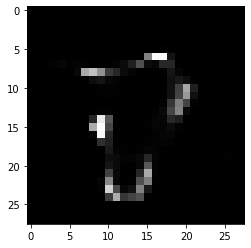

In [102]:
plt.imshow(generated_image.permute(1, 2, 0).squeeze(), cmap="gray")

In [103]:
model

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(256, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (11): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(512, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (1): ReLU()
    (2): ConvTranspose2d(256, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), output_padding=(1, 1))
    (3): ReLU()
    (4): ConvTranspose2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(64, 3

In [104]:
c1 = model.decoder[0](z)
c1 = F.relu(c1)

c2 = model.decoder[2](c1)
c2 = F.relu(c2)

c3 = model.decoder[4](c2)
c3 = F.relu(c3)


c4 = model.decoder[6](c3)
c4 = F.relu(c4)


c5 = model.decoder[8](c4)
c5 = F.relu(c5)


c6 = model.decoder[10](c5)
#c6 = F.relu(c6)


c1.shape, c2.shape, c3.shape, c4.shape, c5.shape, c6.shape


(torch.Size([256, 2, 2]),
 torch.Size([128, 4, 4]),
 torch.Size([64, 7, 7]),
 torch.Size([32, 14, 14]),
 torch.Size([16, 28, 28]),
 torch.Size([1, 28, 28]))

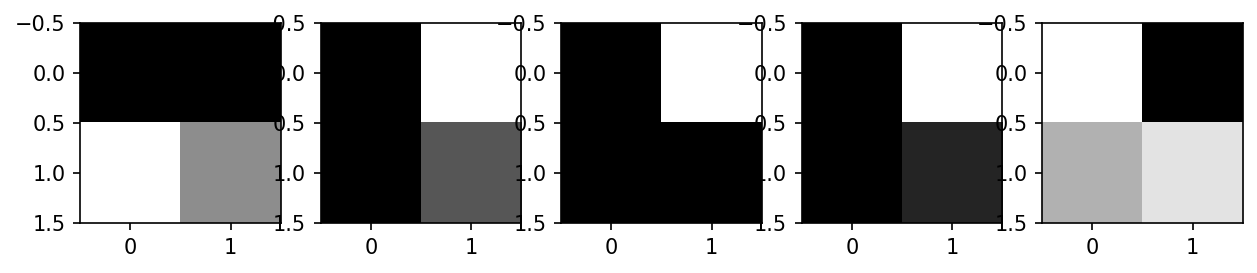

In [105]:
# Visualize som feature maps from c1
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 5, figsize=(10, 6), dpi=150)

    # Plot each image in a separate subplot
    for i in range(5):
        axs[i].imshow(c1[i], cmap='gray')
        
    plt.show()

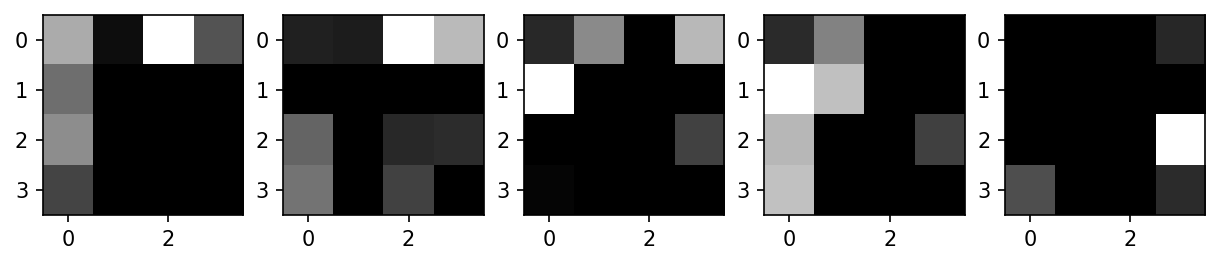

In [106]:
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 5, figsize=(10, 6), dpi=150)

    # Plot each image in a separate subplot
    for i in range(5):
        axs[i].imshow(c2[i], cmap='gray')
        
    plt.show()

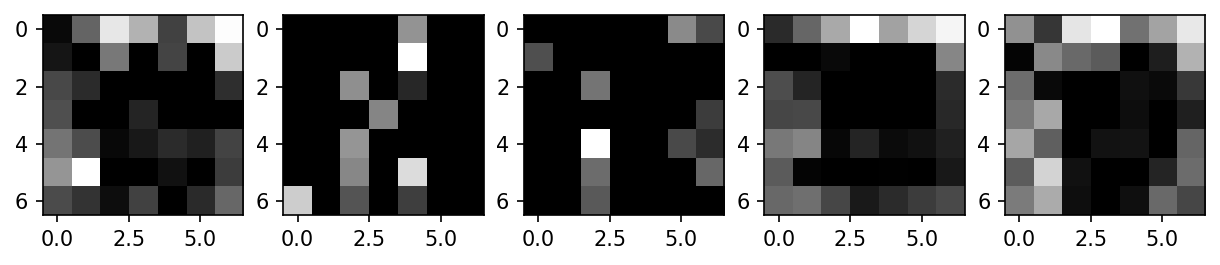

In [107]:
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 5, figsize=(10, 6), dpi=150)

    # Plot each image in a separate subplot
    for i in range(5):
        axs[i].imshow(c3[i], cmap='gray')
        
    plt.show()

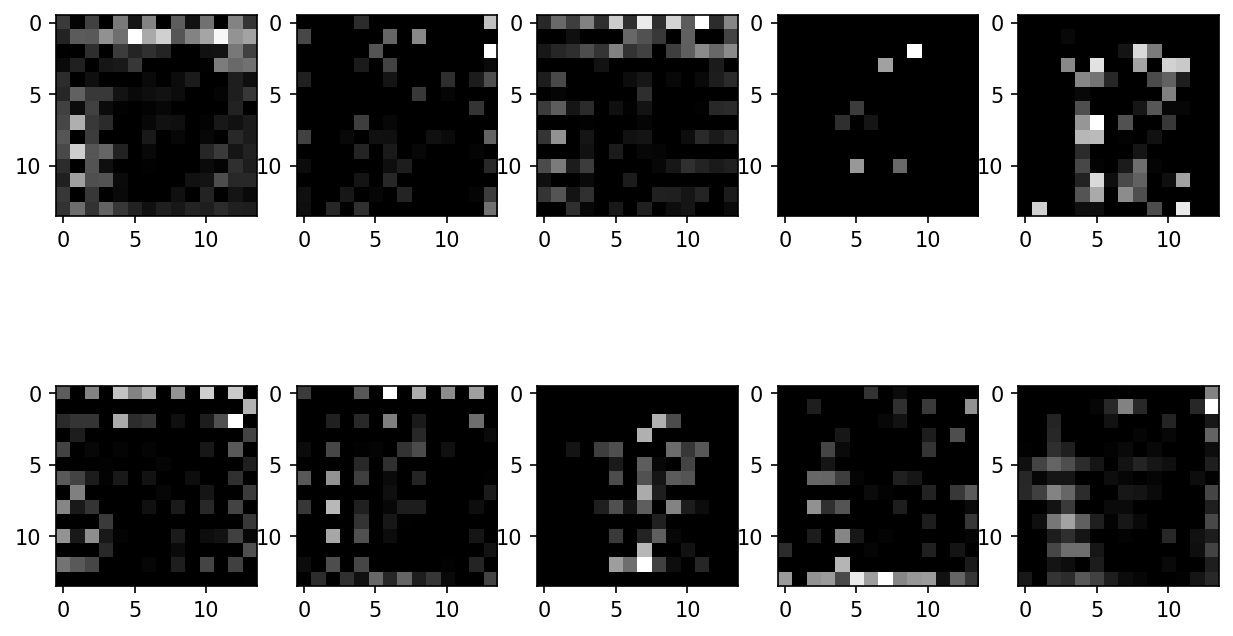

In [108]:
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(2, 5, figsize=(10, 6), dpi=150)

    n = 0
    # Plot each image in a separate subplot
    for j in range(2):
        for i in range(5):
            axs[j, i].imshow(c4[n], cmap='gray')
            n += 1
            
        
    plt.show()

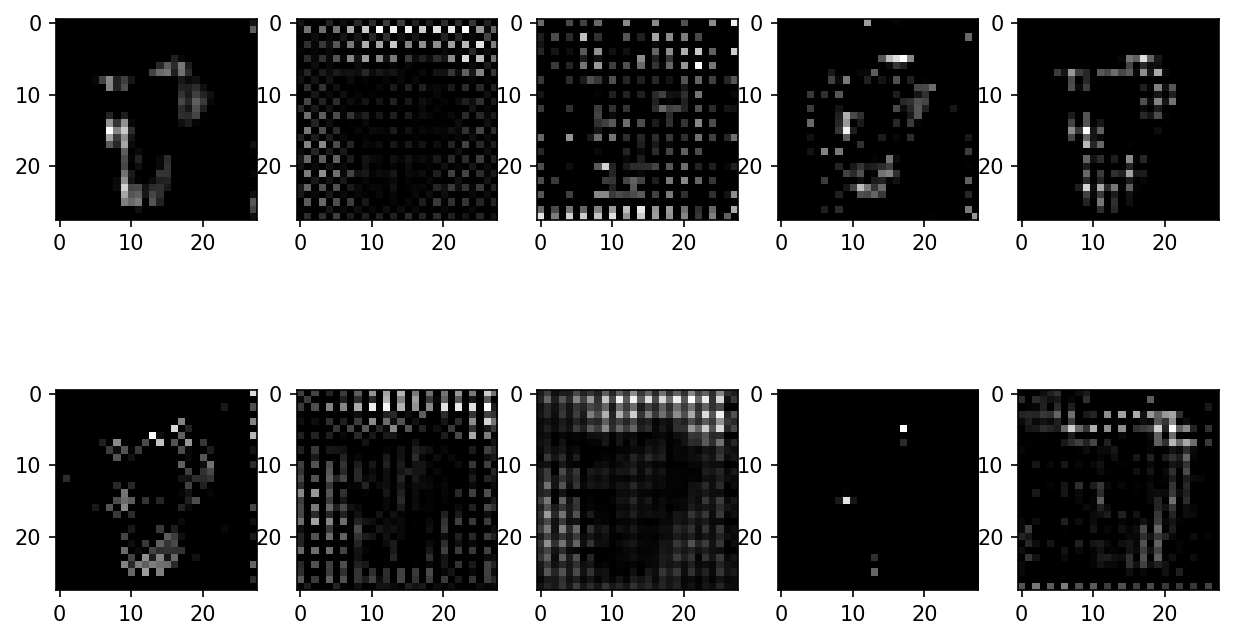

In [109]:
with torch.no_grad():
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(2, 5, figsize=(10, 6), dpi=150)

    n = 0
    # Plot each image in a separate subplot
    for j in range(2):
        for i in range(5):
            axs[j, i].imshow(c5[n], cmap='gray')
            n += 1
            
    plt.show()

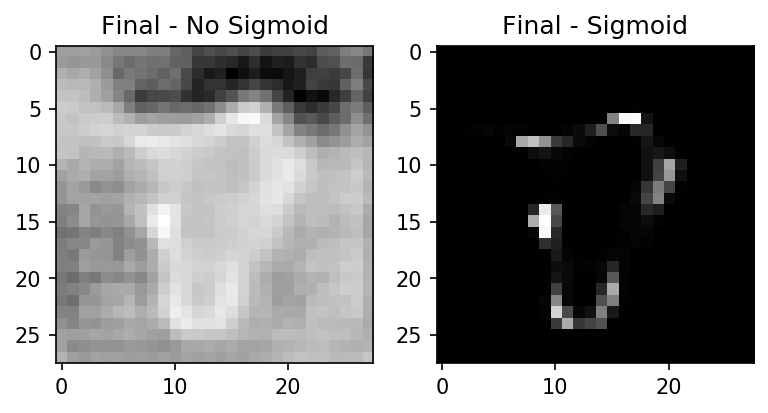

In [110]:
with torch.no_grad():    
    # Create a figure with 5 horizontally arranged subplots
    fig, axs = plt.subplots(1, 2, figsize=(6, 4), dpi=150)

    # Plot each image in a separate subplot
    axs[0].imshow(c6[0], cmap='gray')
    axs[0].set_title('Final - No Sigmoid')
    axs[1].imshow(F.sigmoid(c6[0]), cmap='gray')
    axs[1].set_title('Final - Sigmoid')

        
    plt.show()
    